In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [3]:
data = pd.read_csv('delhi_ncr_aqi_data_historical.csv')

In [5]:
data = data.dropna()

In [7]:
data.head()

,Date,Location,PM2.5,PM10,NO2,SO2,CO,O3,Temperature (°C),Humidity (%),Wind Speed (m/s),Precipitation (mm),Pressure (hPa),Season,AQI
0,2001-01-01,Ghaziabad,55.41,138.96,118.37,14.88,1.41,132.04,33.725684,57.120973,6.755541,155.395577,1028.588536,Winter,126.0
1,2001-01-02,Noida,132.60,84.70,153.63,41.12,1.62,177.25,36.149704,41.863999,5.102142,39.657547,1027.028405,Winter,310.0
2,2001-01-03,Lajpat nagar,120.75,131.75,120.64,11.51,3.52,128.55,8.185017,67.019745,2.018625,90.617615,986.156654,Winter,301.0
3,2001-01-04,Mundka,26.59,162.73,74.19,15.61,2.35,50.83,19.950438,66.489980,5.428947,185.456774,1042.366486,Winter,142.0
4,2001-01-05,Greater Noida,93.67,182.42,12.68,29.58,2.81,20.20,8.197463,71.903886,8.660345,122.442426,984.711903,Winter,212.0


In [9]:
data.tail()

,Date,Location,PM2.5,PM10,NO2,SO2,CO,O3,Temperature (°C),Humidity (%),Wind Speed (m/s),Precipitation (mm),Pressure (hPa),Season,AQI
8669,2024-09-26,Mundka,122.96,216.20,70.97,9.76,3.30,36.30,40.191872,73.815927,4.159799,19.317349,1035.922749,Monsoon,302.0
8670,2024-09-27,Ghaziabad,67.90,66.61,75.06,19.87,3.53,10.06,20.850073,53.673971,5.292210,182.142001,1021.015182,Monsoon,126.0
8671,2024-09-28,Lajpat nagar,145.82,176.62,53.02,10.32,1.91,56.85,24.660646,93.916978,2.310140,75.743421,980.180843,Monsoon,320.0
8672,2024-09-29,Gurugram,109.87,96.63,103.49,23.59,1.57,31.69,26.840788,71.839761,9.718219,47.568214,1040.794588,Monsoon,266.0
8673,2024-09-30,Anand Vihar,140.66,190.43,123.01,15.25,2.90,121.94,9.831405,34.053804,9.279309,29.930124,1010.090730,Monsoon,316.0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8674 entries, 0 to 8673
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                8674 non-null   object 
 1   Location            8674 non-null   object 
 2   PM2.5               8674 non-null   float64
 3   PM10                8674 non-null   float64
 4   NO2                 8674 non-null   float64
 5   SO2                 8674 non-null   float64
 6   CO                  8674 non-null   float64
 7   O3                  8674 non-null   float64
 8   Temperature (°C)    8674 non-null   float64
 9   Humidity (%)        8674 non-null   float64
 10  Wind Speed (m/s)    8674 non-null   float64
 11  Precipitation (mm)  8674 non-null   float64
 12  Pressure (hPa)      8674 non-null   float64
 13  Season              8674 non-null   object 
 14  AQI                 8674 non-null   float64
dtypes: float64(12), object(3)
memory usage: 1016.6+ KB


In [13]:
data.describe()

,PM2.5,PM10,NO2,SO2,CO,O3,Temperature (°C),Humidity (%),Wind Speed (m/s),Precipitation (mm),Pressure (hPa),AQI
count,8674.000000,8674.000000,8674.000000,8674.000000,8674.000000,8674.000000,8674.000000,8674.000000,8674.000000,8674.000000,8674.000000,8674.000000
mean,105.162985,151.265043,81.050196,23.603814,2.549548,94.081247,25.118925,54.826929,5.249615,99.872406,1012.612362,237.431635
std,51.034103,67.531405,41.879336,11.152734,1.199973,48.267149,9.857473,23.232010,2.731838,57.453866,18.750271,89.730162
min,14.070000,28.590000,7.090000,4.010000,0.400000,9.240000,8.001616,15.009209,0.501664,0.097637,980.021521,30.000000
25%,61.982500,93.592500,45.732500,14.192500,1.510000,52.482500,16.685785,34.664778,2.921004,49.413032,996.282602,160.000000
50%,102.995000,147.060000,79.805000,22.995000,2.540000,94.210000,24.967538,54.573148,5.210686,100.576767,1012.851624,245.000000
75%,146.237500,204.240000,116.015000,32.350000,3.530000,135.940000,33.812287,75.180767,7.580496,149.209566,1028.607849,320.000000
max,215.950000,299.920000,164.980000,47.990000,4.950000,179.980000,41.996431,94.991433,9.998728,199.925715,1044.994279,374.000000


In [15]:
data.isnull().sum()

Date                  0
Location              0
PM2.5                 0
PM10                  0
NO2                   0
SO2                   0
CO                    0
O3                    0
Temperature (°C)      0
Humidity (%)          0
Wind Speed (m/s)      0
Precipitation (mm)    0
Pressure (hPa)        0
Season                0
AQI                   0
dtype: int64

# Univariate Analysis

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


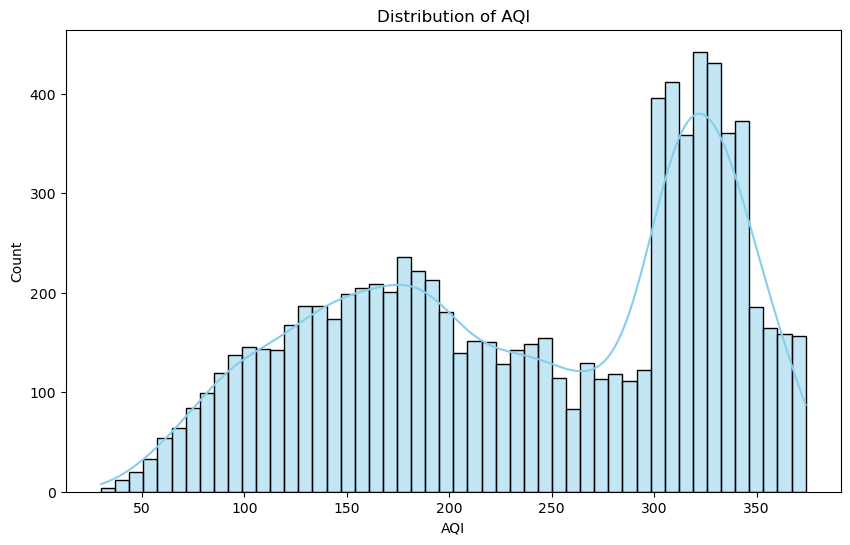

In [17]:
# Plot AQI distribution
plt.figure(figsize=(10,6))
sns.histplot(data['AQI'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of AQI')
plt.xlabel('AQI')
plt.ylabel('Count')
plt.show()

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


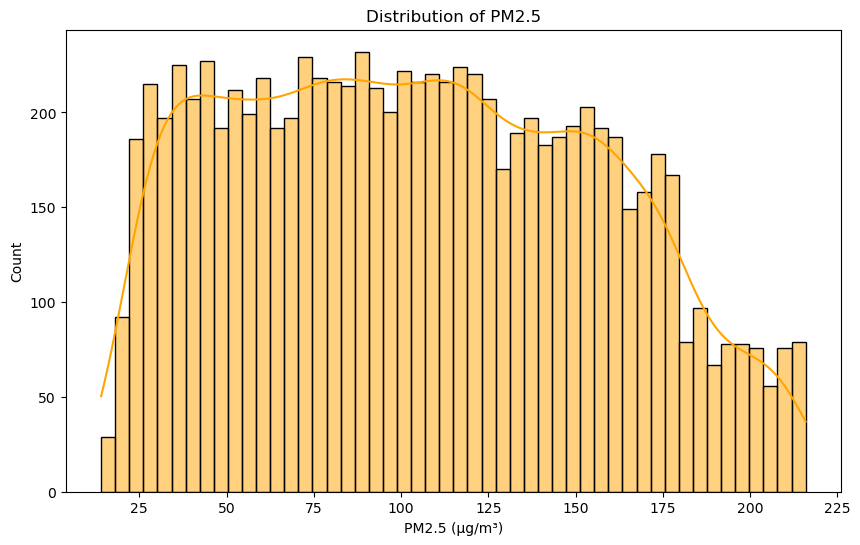

In [19]:
# Plot PM2.5 distribution
plt.figure(figsize=(10,6))
sns.histplot(data['PM2.5'], bins=50, kde=True, color='orange')
plt.title('Distribution of PM2.5')
plt.xlabel('PM2.5 (µg/m³)')
plt.ylabel('Count')
plt.show()

# Bivariate Analysis

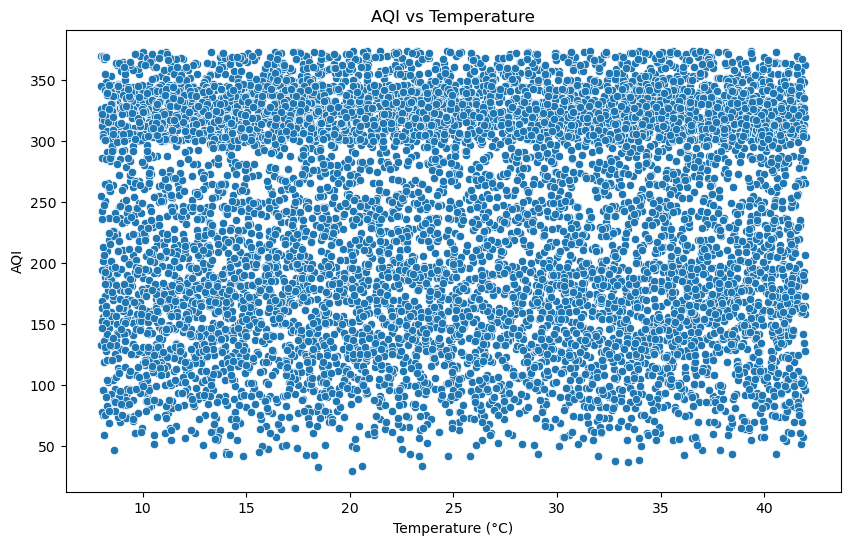

In [21]:
# AQI vs Temperature
plt.figure(figsize=(10,6))
sns.scatterplot(x='Temperature (°C)', y='AQI', data=data)
plt.title('AQI vs Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('AQI')
plt.show()

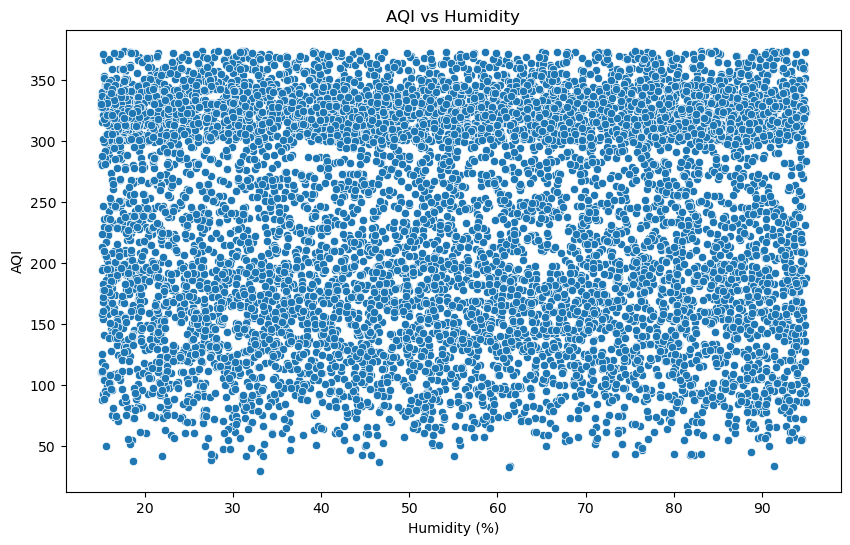

In [23]:
# AQI vs Humidity
plt.figure(figsize=(10,6))
sns.scatterplot(x='Humidity (%)', y='AQI', data=data)
plt.title('AQI vs Humidity')
plt.xlabel('Humidity (%)')
plt.ylabel('AQI')
plt.show()

# Correlation Heatmap

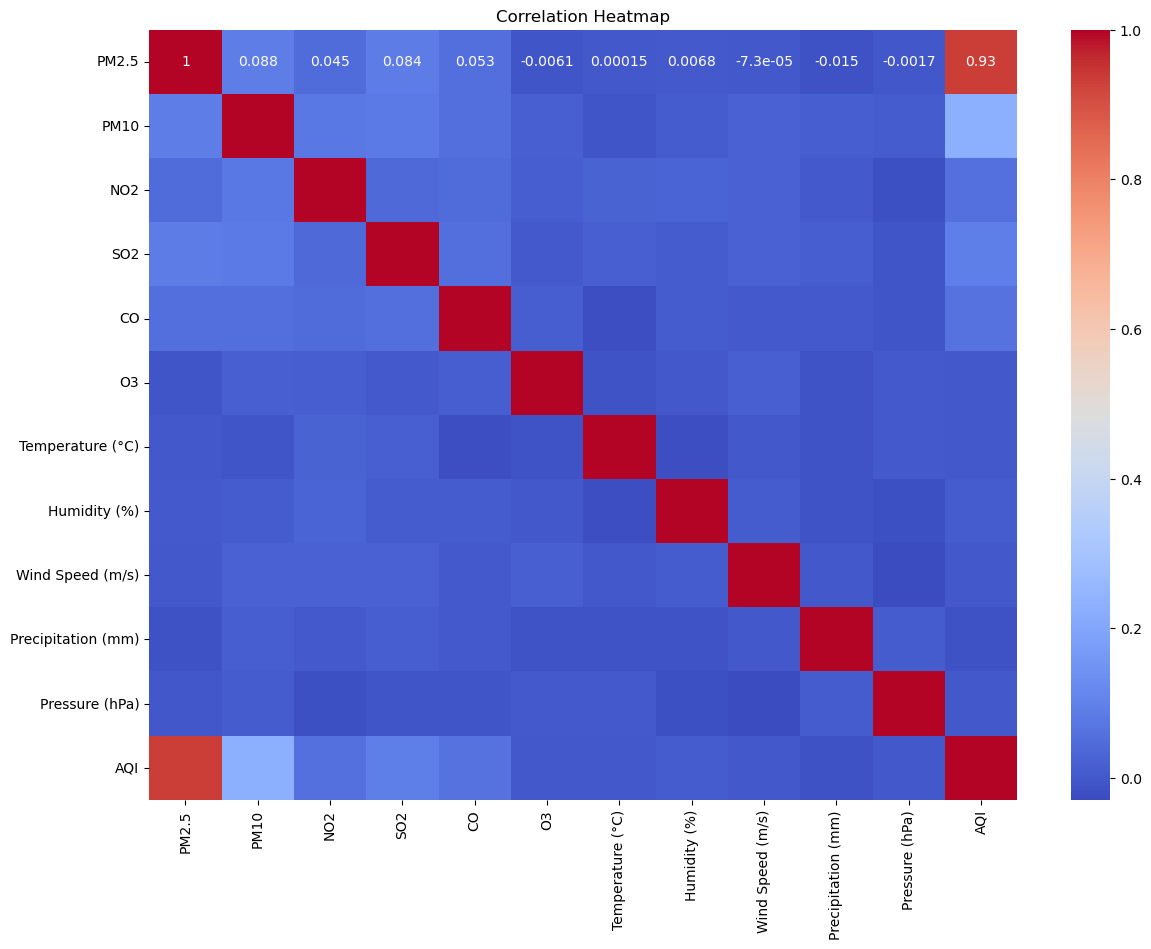

In [25]:
plt.figure(figsize=(14,10))

# Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Now calculate correlation
correlation = numeric_data.corr()

# Plot
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Season-wise AQI Trend

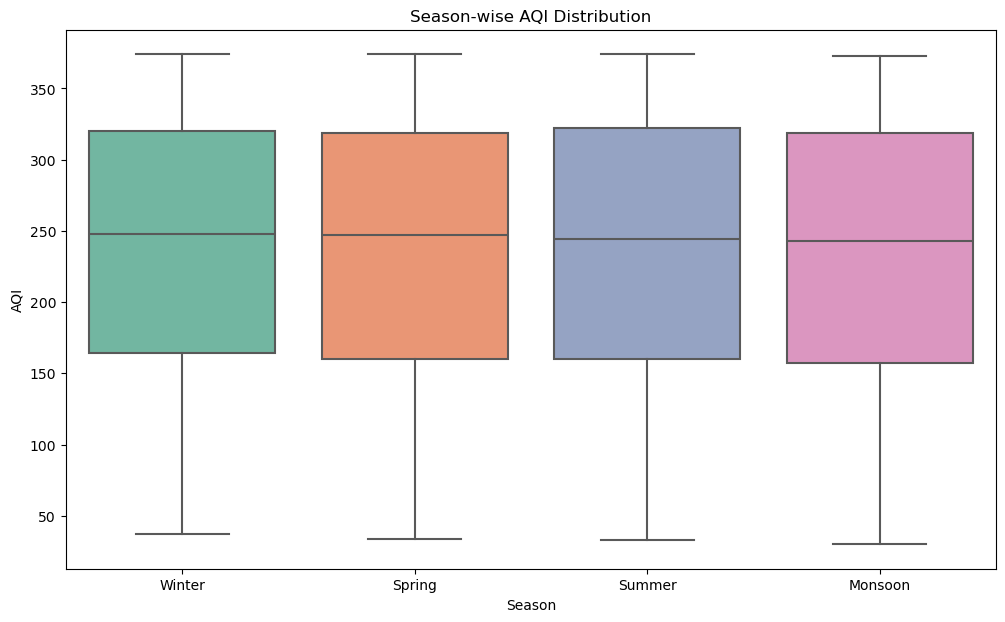

In [27]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Season', y='AQI', data=data, palette='Set2')
plt.title('Season-wise AQI Distribution')
plt.xlabel('Season')
plt.ylabel('AQI')
plt.show()

# Monthly AQI Trend

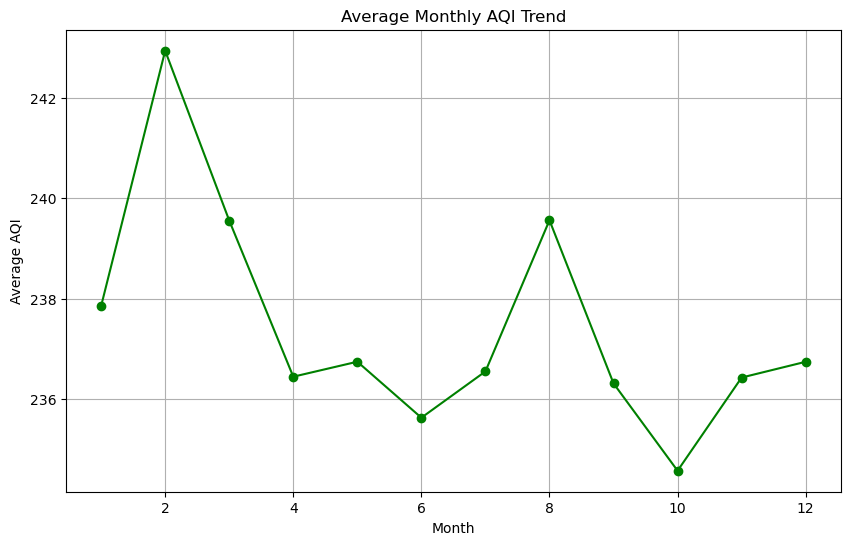

In [29]:
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.month

monthly_aqi = data.groupby('Month')['AQI'].mean()

plt.figure(figsize=(10,6))
monthly_aqi.plot(marker='o', color='green')
plt.title('Average Monthly AQI Trend')
plt.xlabel('Month')
plt.ylabel('Average AQI')
plt.grid()
plt.show()

In [31]:
print(data.columns.tolist())

['Date', 'Location', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3', 'Temperature (°C)', 'Humidity (%)', 'Wind Speed (m/s)', 'Precipitation (mm)', 'Pressure (hPa)', 'Season', 'AQI', 'Month']


In [33]:
print(repr(data.columns))


Index(['Date', 'Location', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3',
       'Temperature (°C)', 'Humidity (%)', 'Wind Speed (m/s)',
       'Precipitation (mm)', 'Pressure (hPa)', 'Season', 'AQI', 'Month'],
      dtype='object')


In [35]:
data = data.drop('Month', axis=1)




In [37]:
data = pd.get_dummies(data, columns=['Location', 'Season'], drop_first=True)

# Random Forest is a tree-based algorithm, and it is not sensitive to feature scales. So normalization (like MinMaxScaler) does not improve model performance

# Random Forest has built-in feature selection capability:

### It can handle many irrelevant features.



# Therefore, Normalization and Feature Scaling is Skipped

In [39]:
# Define average pollutant and weather data based on location and season
average_values = {
    'Badarpur': {
        'Winter': {'PM2.5': 200, 'PM10': 300, 'NO2': 45, 'SO2': 10, 'CO': 0.8, 'O3': 50, 'temperature': 15, 'humidity': 65, 'wind_speed': 2.5, 'precipitation': 52, 'pressure': 1010},
        'Summer': {'PM2.5': 110, 'PM10': 120, 'NO2': 38, 'SO2': 15, 'CO': 1.2, 'O3': 55, 'temperature': 40, 'humidity': 25, 'wind_speed': 3.0, 'precipitation': 0, 'pressure': 1005},
        'Spring': {'PM2.5': 90, 'PM10': 120, 'NO2': 38, 'SO2': 10, 'CO': 1.0, 'O3': 60, 'temperature': 25, 'humidity': 45, 'wind_speed': 2.0, 'precipitation': 10, 'pressure': 1012}
    },
    'Dwarka': {
        'Winter': {'PM2.5': 150, 'PM10': 220, 'NO2': 46, 'SO2': 14, 'CO': 0.7, 'O3': 48, 'temperature': 16, 'humidity': 62, 'wind_speed': 2.3, 'precipitation': 55, 'pressure': 1011},
        'Summer': {'PM2.5': 89, 'PM10': 130, 'NO2': 35, 'SO2': 17, 'CO': 1.1, 'O3': 53, 'temperature': 38, 'humidity': 30, 'wind_speed': 3.3, 'precipitation': 0, 'pressure': 1008},
        'Spring': {'PM2.5': 58, 'PM10': 130, 'NO2': 39, 'SO2': 8, 'CO': 0.9, 'O3': 55, 'temperature': 26, 'humidity': 52, 'wind_speed': 2.1, 'precipitation': 17, 'pressure': 1013}
    },
    'Ghaziabad': {
        'Winter': {'PM2.5': 245, 'PM10': 350, 'NO2': 43, 'SO2': 11, 'CO': 0.7, 'O3': 47, 'temperature': 16, 'humidity': 58, 'wind_speed': 2.4, 'precipitation': 53, 'pressure': 1011},
        'Summer': {'PM2.5': 100, 'PM10': 270, 'NO2': 35, 'SO2': 18, 'CO': 1.3, 'O3': 54, 'temperature': 40, 'humidity': 32, 'wind_speed': 3.4, 'precipitation': 0, 'pressure': 1007},
        'Spring': {'PM2.5': 100, 'PM10': 150, 'NO2': 40, 'SO2': 10, 'CO': 1.0, 'O3': 58, 'temperature': 28, 'humidity': 50, 'wind_speed': 2.2, 'precipitation': 18, 'pressure': 1012}
    },
    'Greater Noida': {
        'Winter': {'PM2.5': 245, 'PM10': 330, 'NO2': 43, 'SO2': 9, 'CO': 0.7, 'O3': 45, 'temperature': 14, 'humidity': 62, 'wind_speed': 2.4, 'precipitation':54, 'pressure': 1010},
        'Summer': {'PM2.5': 96, 'PM10': 200, 'NO2': 34, 'SO2': 16, 'CO': 1.1, 'O3': 50, 'temperature': 38, 'humidity': 30, 'wind_speed': 3.0, 'precipitation': 0, 'pressure': 1006},
        'Spring': {'PM2.5': 150, 'PM10': 140, 'NO2': 38, 'SO2': 10, 'CO': 0.9, 'O3': 55, 'temperature': 25, 'humidity': 55, 'wind_speed': 2.1, 'precipitation': 19, 'pressure': 1011}
    },
    'Gurugram': {
        'Winter': {'PM2.5': 300, 'PM10': 250, 'NO2': 47, 'SO2': 10, 'CO': 0.8, 'O3': 49, 'temperature': 15, 'humidity': 61, 'wind_speed': 2.5, 'precipitation': 53, 'pressure': 1010},
        'Summer': {'PM2.5': 99, 'PM10': 270, 'NO2': 39, 'SO2': 16, 'CO': 1.2, 'O3': 52, 'temperature': 40, 'humidity': 31, 'wind_speed': 3.2, 'precipitation': 0, 'pressure': 1007},
        'Spring': {'PM2.5': 150, 'PM10': 150, 'NO2': 39, 'SO2': 10, 'CO': 1.0, 'O3': 56, 'temperature': 26, 'humidity': 53, 'wind_speed': 2.3, 'precipitation': 17, 'pressure': 1012}
    },
     'Lajpat Nagar': {
        'Winter': {'PM2.5': 250, 'PM10': 200, 'NO2': 42, 'SO2': 12, 'CO': 0.9, 'O3': 45, 'temperature': 17, 'humidity': 65, 'wind_speed': 2.4, 'precipitation': 53, 'pressure': 1010},
        'Summer': {'PM2.5': 90, 'PM10': 130, 'NO2': 33, 'SO2': 18, 'CO': 1.3, 'O3': 52, 'temperature': 38, 'humidity': 25, 'wind_speed': 3.5, 'precipitation': 0, 'pressure': 1006},
        'Spring': {'PM2.5': 75, 'PM10': 125, 'NO2': 39, 'SO2': 7, 'CO': 1.1, 'O3': 58, 'temperature': 28, 'humidity': 55, 'wind_speed': 2.2, 'precipitation': 18, 'pressure': 1011}
    },
    'Mundka': {
        'Winter': {'PM2.5': 200, 'PM10': 250, 'NO2': 43, 'SO2': 11, 'CO': 0.8, 'O3': 46, 'temperature': 16, 'humidity': 60, 'wind_speed': 2.4, 'precipitation': 54, 'pressure': 1011},
        'Summer': {'PM2.5': 75, 'PM10': 150, 'NO2': 32, 'SO2': 17, 'CO': 1.1, 'O3': 51, 'temperature': 37, 'humidity': 28, 'wind_speed': 3.3, 'precipitation': 0, 'pressure': 1006},
        'Spring': {'PM2.5': 85, 'PM10': 135, 'NO2': 39, 'SO2': 10, 'CO': 1.0, 'O3': 54, 'temperature': 26, 'humidity': 52, 'wind_speed': 2.2, 'precipitation': 17, 'pressure': 1012}
    },
    'Noida': {
        'Winter': {'PM2.5': 175, 'PM10': 210, 'NO2': 47, 'SO2': 11, 'CO': 0.8, 'O3': 49, 'temperature': 16, 'humidity': 63, 'wind_speed': 2.5, 'precipitation': 53, 'pressure': 1010},
        'Summer': {'PM2.5': 100, 'PM10': 190, 'NO2': 36, 'SO2': 15, 'CO': 1.1, 'O3': 50, 'temperature': 42, 'humidity': 30, 'wind_speed': 3.0, 'precipitation': 0, 'pressure': 1006},
        'Spring': {'PM2.5': 100, 'PM10': 130, 'NO2': 37, 'SO2': 8, 'CO': 1.0, 'O3': 53, 'temperature': 25, 'humidity': 55, 'wind_speed': 2.2, 'precipitation': 18, 'pressure': 1011}
    },
    'Sarita Vihar': {
        'Winter': {'PM2.5': 190, 'PM10': 220, 'NO2': 46, 'SO2': 11, 'CO': 0.8, 'O3': 49, 'temperature': 16, 'humidity': 63, 'wind_speed': 2.5, 'precipitation': 53, 'pressure': 1010},
        'Summer': {'PM2.5': 110, 'PM10': 220, 'NO2': 40, 'SO2': 15, 'CO': 1.1, 'O3': 50, 'temperature': 40, 'humidity': 30, 'wind_speed': 3.0, 'precipitation': 0, 'pressure': 1006},
        'Spring': {'PM2.5': 90, 'PM10': 120, 'NO2': 37, 'SO2': 9, 'CO': 1.0, 'O3': 53, 'temperature': 25, 'humidity': 55, 'wind_speed': 2.2, 'precipitation': 18, 'pressure': 1011}
    },
    'Rohini': {
        'Winter': {'PM2.5': 230, 'PM10': 300, 'NO2': 45, 'SO2': 11, 'CO': 0.8, 'O3': 49, 'temperature': 16, 'humidity': 63, 'wind_speed': 2.5, 'precipitation': 53, 'pressure': 1010},
        'Summer': {'PM2.5': 100, 'PM10': 140, 'NO2': 40, 'SO2': 15, 'CO': 1.1, 'O3': 50, 'temperature': 40, 'humidity': 30, 'wind_speed': 3.0, 'precipitation': 0, 'pressure': 1006},
        'Spring': {'PM2.5': 120, 'PM10': 140, 'NO2': 37, 'SO2': 10, 'CO': 1.0, 'O3': 53, 'temperature': 25, 'humidity': 55, 'wind_speed': 2.2, 'precipitation': 18, 'pressure': 1011}
    }
    # Add other locations as necessary
}

In [41]:
# Define function to categorize AQI
def categorize_aqi(aqi):
    if aqi <= 50:
        return 0  # Good
    elif 51 <= aqi <= 100:
        return 1  # Satisfactory
    elif 101 <= aqi <= 200:
        return 2  # Moderate
    elif 201 <= aqi <= 300:
        return 3  # Poor
    elif 301 <= aqi <= 400:
        return 4  # Very Poor
    else:
        return 5  # Severe

In [43]:
data['AQI_Class'] = data['AQI'].apply(categorize_aqi)

In [45]:
# Features and target variable
X = data.drop(['AQI', 'AQI_Class', 'Date'], axis=1)
y = data['AQI_Class']

In [47]:
from sklearn.preprocessing import StandardScaler

In [49]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [51]:
# 80-20 Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [53]:
# Train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [55]:
# Predictions and evaluation
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy (80-20): {accuracy:.2f}')
print('Classification Report (80-20):')
print(classification_report(y_test, y_pred))
print('Confusion Matrix (80-20):')
print(confusion_matrix(y_test, y_pred))

Accuracy (80-20): 0.99
Classification Report (80-20):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.95      0.97      0.96       131
           2       0.99      1.00      1.00       570
           3       1.00      0.99      1.00       360
           4       1.00      1.00      1.00       668

    accuracy                           0.99      1735
   macro avg       0.79      0.79      0.79      1735
weighted avg       0.99      0.99      0.99      1735

Confusion Matrix (80-20):
[[  0   6   0   0   0]
 [  0 127   4   0   0]
 [  0   0 570   0   0]
 [  0   0   1 358   1]
 [  0   0   0   0 668]]


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
import joblib


import joblib
# Save the trained model
joblib.dump(rf_classifier, 'airsenseai_rf_model.pkl')
# Save the scaler
joblib.dump(scaler, 'airsenseai_scaler_model.pkl')

print("Model saved as 'airsenseai_rf_model.pkl'.")
print("Model saved as 'airsenseai_scaler_model.pkl'.")


Model saved as 'airsenseai_rf_model.pkl'.
Model saved as 'airsenseai_scaler_model.pkl'.


In [59]:
print(X.columns.tolist())

['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3', 'Temperature (°C)', 'Humidity (%)', 'Wind Speed (m/s)', 'Precipitation (mm)', 'Pressure (hPa)', 'Location_Badarpur', 'Location_Dwarka', 'Location_Ghaziabad', 'Location_Greater Noida', 'Location_Gurugram', 'Location_Lajpat nagar', 'Location_Mundka', 'Location_Noida', 'Location_Rohini', 'Location_sarita Vihar', 'Season_Spring', 'Season_Summer', 'Season_Winter']


In [61]:
def predict_aqi(location, season, user_input_data=None):
    try:
        # Load model and scaler
        rf_classifier = joblib.load('airsenseai_rf_model.pkl')
        scaler = joblib.load('airsenseai_scaler.pkl')

        # Define required structure
        location_categories = ['Badarpur', 'Dwarka', 'Ghaziabad', 'Greater Noida', 'Gurugram',
                               'Lajpat nagar', 'Mundka', 'Noida', 'Rohini', 'Sarita Vihar']
        season_categories = ['Spring', 'Summer', 'Winter']

        # Validate location and season
        if location not in location_categories or season.capitalize() not in season_categories:
            raise ValueError("Invalid location or season name.")

        # If user_input_data is None, use average_values
        if user_input_data is None:
            if location not in average_values or season.capitalize() not in average_values[location]:
                raise ValueError("Location or season not found in average values.")

            features = average_values[location][season.capitalize()]
            numerical_input = [
                features['PM2.5'],
                features['PM10'],
                features['NO2'],
                features['SO2'],
                features['CO'],
                features['O3'],
                features['temperature'],
                features['humidity'],
                features['wind_speed'],
                features['precipitation'],
                features['pressure']
            ]
        else:
            if len(user_input_data) != 11:
                raise ValueError("User input must have exactly 11 numerical features.")
            numerical_input = user_input_data

        # One-hot encode location
        location_encoded = [1 if loc == location else 0 for loc in location_categories]

        # One-hot encode season
        season_encoded = [1 if s.lower() == season.lower() else 0 for s in season_categories]

        # Combine all features
        full_input = numerical_input + location_encoded + season_encoded

        # Save for future prediction
        current_features = full_input.copy()

        # Scale the input
        input_scaled = scaler.transform([full_input])

        # Make prediction
        prediction = rf_classifier.predict(input_scaled)
        predicted_class = prediction[0]

        aqi_category = {
            0: "Good (0-50)",
            1: "Satisfactory (51-100)",
            2: "Moderate (101-200)",
            3: "Poor (201-300)",
            4: "Very Poor (301-400)",
            5: "Severe (401-500)"
        }

        print(f"Predicted AQI Class: {aqi_category[predicted_class]}")

         # Health recommendations
        if predicted_class == 0:
            print("Patients can continue daily outdoor routines without concern. Maintain indoor air quality with proper ventilation.")
        elif predicted_class == 1:
            print("Avoid prolonged outdoor activities. Use air purifiers at home to minimize indoor pollutants.")
        elif predicted_class == 2:
            print("Always carry prescribed inhalers or medications when outdoors. Limit physical exertion outdoors, opt for indoor exercise. Use face masks (surgical masks or cloth masks) for protection.")
        elif predicted_class == 3:
            print("Wear N95 masks when stepping outside to filter harmful pollutants. Keep windows and doors closed, seal gaps to prevent pollutants from entering. Install HEPA-filter-based air purifiers at home and workplaces.")
        elif predicted_class == 4:
            print("Avoid all outdoor activities, schedule essential tasks for times of lower AQI. Use high-quality respirators (N99 or better). Maintain indoor humidity levels using humidifiers to prevent throat irritation.")
        elif predicted_class == 5:
            print("Patients should strictly remain indoors in air-conditioned environments with purified air. Hospitals and clinics should increase preparedness for respiratory emergencies. Seek immediate medical attention for persistent symptoms like chest tightness or extreme breathlessness. Follow government advisories and emergency protocols.")

    except Exception as e:
        print(f"Error during prediction: {str(e)}")

    choice = input("\nDo you want AQI prediction for the next 3 days? (yes/no): ").lower()
    if choice == "yes":
        predict_future_aqi_classes(current_features, rf_classifier, scaler)
    else:
        print("Hope this was useful for you")



In [63]:
def predict_future_aqi_classes(current_features, model, scaler):
    np.random.seed(42)  # Ensures reproducibility of random variations

    aqi_category = {
        0: "Good (0-50)",
        1: "Satisfactory (51-100)",
        2: "Moderate (101-200)",
        3: "Poor (201-300)",
        4: "Very Poor (301-400)",
        5: "Severe (401-500)"
    }

    # Health recommendations for each AQI class
    health_precautions = {
        0: "Patients can continue daily outdoor routines without concern. Maintain indoor air quality with proper ventilation.",
        1: "Avoid prolonged outdoor activities. Use air purifiers at home to minimize indoor pollutants.",
        2: "Always carry prescribed inhalers or medications when outdoors. Limit physical exertion outdoors, opt for indoor exercise. Use face masks (surgical masks or cloth masks) for protection.",
        3: "Wear N95 masks when stepping outside to filter harmful pollutants. Keep windows and doors closed, seal gaps to prevent pollutants from entering. Install HEPA-filter-based air purifiers at home and workplaces.",
        4: "Avoid all outdoor activities, schedule essential tasks for times of lower AQI. Use high-quality respirators (N99 or better). Maintain indoor humidity levels using humidifiers to prevent throat irritation.",
        5: "Patients should strictly remain indoors in air-conditioned environments with purified air. Hospitals and clinics should increase preparedness for respiratory emergencies. Seek immediate medical attention for persistent symptoms like chest tightness or extreme breathlessness. Follow government advisories and emergency protocols."
    }

    # Additional recommendations for respiratory patients
    additional_recommendations = {
        "Nutritional Support": [
            "Incorporate antioxidant-rich fruits (oranges, guavas, berries) and leafy greens (spinach, kale).",
            "Include omega-3 fatty acids (walnuts, fatty fish).",
            "Drink 2-3 liters of water daily.",
            "Warm fluids like herbal teas and soups."
        ],
        "Symptoms": [
            "Use health apps to track symptoms (cough, wheezing).",
            "Schedule regular pulmonologist check-ups.",
            "Use pulse oximeters and spirometers to track lung function."
        ],
        "Behavioural Adjustments": [
            "Avoid outdoor activities during peak pollution hours. Engage in indoor exercises like yoga.",
            "Reside in green spaces.",
            "Use air-conditioned vehicles with recirculation."
        ],
        "Environmental Adjustments": [
            "Invest in HEPA-filter air purifiers.",
            "Use humidifiers to maintain indoor humidity (30-50%).",
            "Include air-purifying plants.",
            "Avoid candles, incense, and solid fuels for indoor use."
        ],
        "Psychological Support": [
            "Provide mental health support for anxiety.",
            "Join support groups to share coping strategies."
        ],
        "Emergency Preparedness": [
            "Ensure emergency kits with N95/N99 masks, inhalers, nebulizers, and oxygen cylinders.",
            "Keep a list of hospitals and emergency services handy."
        ]
    }

    print("\nFuture AQI Class Predictions for Next 3 Days:\n")

    # To track if any day has a severe AQI
    severe_found = False
    for day in range(1, 4):
        future_input = current_features.copy()
        
        # Slightly vary the first 11 numerical environmental features
        for i in range(11):
            future_input[i] += np.random.normal(0, 2)

        input_scaled = scaler.transform([future_input])
        predicted_class = model.predict(input_scaled)[0]

        print(f"Day {day}: {aqi_category[predicted_class]}")

        # Print health recommendations for the predicted AQI class
        print(f"Health Recommendations: {health_precautions[predicted_class]}")

        # Print additional recommendations for respiratory patients
        print("\nAdditional Recommendations for Respiratory Patients:")
        for category, recommendations in additional_recommendations.items():
            print(f"\n{category}:")
            for rec in recommendations:
                print(f"- {rec}")

        print("\n" + "="*50)  # Separator line for better readability

        # Check if any day's prediction is 'Severe'
        if predicted_class == 5:
            severe_found = True

    # Display collective precaution based on worst (severe) case
    if severe_found:
        print("\n**Collective Precaution**: Since the AQI prediction includes a 'Severe' category, it is advised to strictly remain indoors in air-conditioned environments with purified air. Hospitals and clinics should increase preparedness for respiratory emergencies. Seek immediate medical attention for persistent symptoms like chest tightness or extreme breathlessness. Follow government advisories and emergency protocols.")
    else:
        print("\n**Collective Precaution**: Ensure proper ventilation at home, avoid prolonged outdoor activities, and wear face masks if necessary. Use air purifiers to maintain indoor air quality.")


In [65]:
print(X.columns.tolist())

['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3', 'Temperature (°C)', 'Humidity (%)', 'Wind Speed (m/s)', 'Precipitation (mm)', 'Pressure (hPa)', 'Location_Badarpur', 'Location_Dwarka', 'Location_Ghaziabad', 'Location_Greater Noida', 'Location_Gurugram', 'Location_Lajpat nagar', 'Location_Mundka', 'Location_Noida', 'Location_Rohini', 'Location_sarita Vihar', 'Season_Spring', 'Season_Summer', 'Season_Winter']


In [67]:
sample_input = [
    92.5,     # PM2.5
    160.3,    # PM10
    45.7,     # NO2
    11.2,     # SO2
    1.03,     # CO
    75.8,     # O3
    29.5,     # Temperature (°C)
    40.2,     # Humidity (%)
    2.5,      # Wind Speed (m/s)
    0.0,      # Precipitation (mm)
    1012.3    # Pressure (hPa)
]

In [69]:
predict_aqi("Noida", "Winter", user_input_data=sample_input)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Predicted AQI Class: Poor (201-300)
Wear N95 masks when stepping outside to filter harmful pollutants. Keep windows and doors closed, seal gaps to prevent pollutants from entering. Install HEPA-filter-based air purifiers at home and workplaces.



Do you want AQI prediction for the next 3 days? (yes/no):  no


Hope this was useful for you


In [71]:
sample_input = [119.3668502,	76.86871481,	63.28525292,	12.35915769,	1.8714504,	94.92241832,	27.11105123,	33.90445539,	13.10215309,	21.83232941,	1045.383384]
predict_aqi("Ghaziabad", "Summer", user_input_data=sample_input)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Predicted AQI Class: Poor (201-300)
Wear N95 masks when stepping outside to filter harmful pollutants. Keep windows and doors closed, seal gaps to prevent pollutants from entering. Install HEPA-filter-based air purifiers at home and workplaces.



Do you want AQI prediction for the next 3 days? (yes/no):  yes



Future AQI Class Predictions for Next 3 Days:

Day 1: Poor (201-300)
Health Recommendations: Wear N95 masks when stepping outside to filter harmful pollutants. Keep windows and doors closed, seal gaps to prevent pollutants from entering. Install HEPA-filter-based air purifiers at home and workplaces.

Additional Recommendations for Respiratory Patients:

Nutritional Support:
- Incorporate antioxidant-rich fruits (oranges, guavas, berries) and leafy greens (spinach, kale).
- Include omega-3 fatty acids (walnuts, fatty fish).
- Drink 2-3 liters of water daily.
- Warm fluids like herbal teas and soups.

Symptoms:
- Use health apps to track symptoms (cough, wheezing).
- Schedule regular pulmonologist check-ups.
- Use pulse oximeters and spirometers to track lung function.

Behavioural Adjustments:
- Avoid outdoor activities during peak pollution hours. Engage in indoor exercises like yoga.
- Reside in green spaces.
- Use air-conditioned vehicles with recirculation.

Environmental Adjustme

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [73]:
predict_aqi("Badarpur", "Spring", None)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Predicted AQI Class: Moderate (101-200)
Always carry prescribed inhalers or medications when outdoors. Limit physical exertion outdoors, opt for indoor exercise. Use face masks (surgical masks or cloth masks) for protection.



Do you want AQI prediction for the next 3 days? (yes/no):  yes



Future AQI Class Predictions for Next 3 Days:

Day 1: Poor (201-300)
Health Recommendations: Wear N95 masks when stepping outside to filter harmful pollutants. Keep windows and doors closed, seal gaps to prevent pollutants from entering. Install HEPA-filter-based air purifiers at home and workplaces.

Additional Recommendations for Respiratory Patients:

Nutritional Support:
- Incorporate antioxidant-rich fruits (oranges, guavas, berries) and leafy greens (spinach, kale).
- Include omega-3 fatty acids (walnuts, fatty fish).
- Drink 2-3 liters of water daily.
- Warm fluids like herbal teas and soups.

Symptoms:
- Use health apps to track symptoms (cough, wheezing).
- Schedule regular pulmonologist check-ups.
- Use pulse oximeters and spirometers to track lung function.

Behavioural Adjustments:
- Avoid outdoor activities during peak pollution hours. Engage in indoor exercises like yoga.
- Reside in green spaces.
- Use air-conditioned vehicles with recirculation.

Environmental Adjustme

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np

In [77]:
df = pd.read_csv('delhi_ncr_aqi_data_historical.csv')

In [79]:
# Convert AQI into categories (example: binning AQI values)
bins = [0, 50, 100, 150, 200, 300, np.inf]
labels = ['Good', 'Satisfactory','Moderate', 'Poor', 'Very Poor', 'Severe']
df['AQI_Class'] = pd.cut(df['AQI'], bins=bins, labels=labels)

In [81]:
# Features and target
X = df.drop(columns=['AQI', 'AQI_Class'])  # Replace with your feature columns
y = df['AQI_Class']  # Now y is a categorical variable

In [83]:
# Ensure all columns in X are numeric after processing
X = X.apply(pd.to_numeric, errors='coerce')  # Convert any non-numeric to NaN
X = X.fillna(0)  

In [85]:
# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [87]:
# Initialize model (classifier)
model = RandomForestClassifier(random_state=42)

In [89]:
# Split ratios for train-test splits
split_ratios = [0.9, 0.8, 0.7, 0.6]  # 90-10, 80-20, 70-30, 60-40

In [91]:
# KFold configuration
kfold = KFold(n_splits=10, shuffle=True, random_state=42)


In [93]:
# For each split ratio, perform KFold analysis
for ratio in split_ratios:
    # Split data into train and test based on ratio
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=1-ratio, random_state=42)
    
    # Apply KFold Cross-Validation
    scores = cross_val_score(model, X_train, y_train, cv=kfold)
    
    # Output results
    print(f"Training Ratio: {ratio*100:.0f}%, Test Ratio: {(1-ratio)*100:.0f}%")
    print(f"K-Fold Cross-Validation Scores: {scores}")
    print(f"Mean Accuracy: {np.mean(scores)*100:.2f}%")
    print(f"Standard Deviation of Scores: {np.std(scores)*100:.2f}%\n")

Training Ratio: 90%, Test Ratio: 10%
K-Fold Cross-Validation Scores: [0.99231754 0.99359795 0.99871959 0.99359795 0.99871959 0.99871959
 0.99102564 0.99102564 0.99102564 0.99615385]
Mean Accuracy: 99.45%
Standard Deviation of Scores: 0.31%

Training Ratio: 80%, Test Ratio: 20%
K-Fold Cross-Validation Scores: [0.99567723 0.99567723 0.99855908 0.98991354 0.99711816 0.98847262
 0.99567723 0.99711816 0.99567723 0.997114  ]
Mean Accuracy: 99.51%
Standard Deviation of Scores: 0.31%

Training Ratio: 70%, Test Ratio: 30%
K-Fold Cross-Validation Scores: [0.99342105 0.99011532 0.99670511 0.99505766 0.99176277 0.99176277
 0.99505766 1.         0.99670511 0.98846787]
Mean Accuracy: 99.39%
Standard Deviation of Scores: 0.33%

Training Ratio: 60%, Test Ratio: 40%
K-Fold Cross-Validation Scores: [0.99424184 0.99424184 0.9865643  0.98080614 0.99615385 0.99807692
 0.99423077 1.         0.99423077 0.99423077]
Mean Accuracy: 99.33%
Standard Deviation of Scores: 0.53%



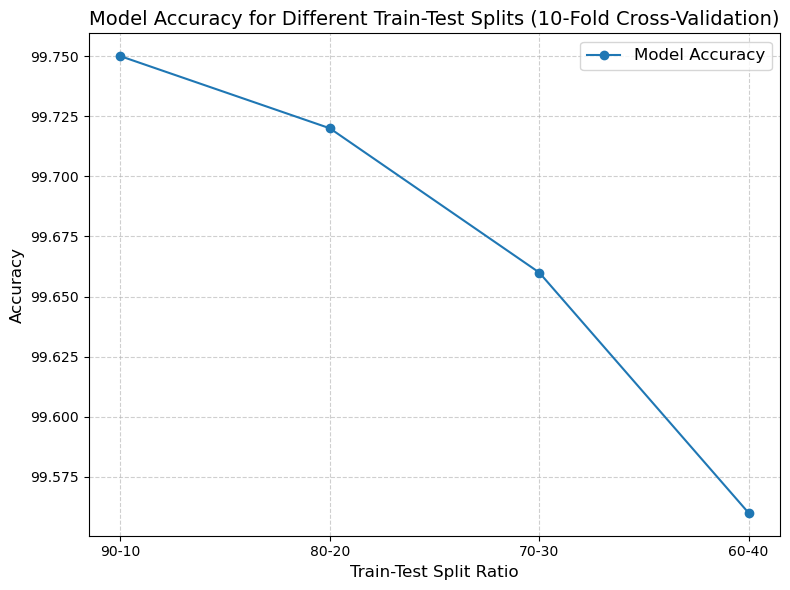

In [95]:
import matplotlib.pyplot as plt

# Example accuracies for each split ratio
split_ratios = ["90-10", "80-20", "70-30", "60-40"]
accuracies = [99.75, 99.72, 99.66, 99.56]  # Replace with actual accuracies

# Plot the accuracies
plt.figure(figsize=(8, 6))
plt.plot(split_ratios, accuracies, marker='o', label="Model Accuracy")

# Adding labels and title
plt.title("Model Accuracy for Different Train-Test Splits (10-Fold Cross-Validation)", fontsize=14)
plt.xlabel("Train-Test Split Ratio", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

In [97]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, recall_score, f1_score

# Initialize lists to store metrics
confusion_matrices = []
ratios = ['90-10', '80-20', '70-30', '60-40']

datasets = []
for ratio in [0.9, 0.8, 0.7, 0.6]:  # Corresponds to 90-10, 80-20, etc.
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=1-ratio, random_state=42)
    datasets.append((X_train, X_test, y_train, y_test))


# Iterate through the split ratios
for ratio, (X_train, X_test, y_train, y_test) in zip(ratios, datasets):
    # Train the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Compute metrics
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)



# Display confusion matrices
for ratio, cm in zip(ratios, confusion_matrices):
    print(f"Confusion Matrix for {ratio} split:")
    print(cm)
    print()

Confusion Matrix for 90-10 split:
[[  0   0   0   3   0   0]
 [  0 119   0   0   0   0]
 [  0   0 163   0   0   0]
 [  0   2   0  65   0   0]
 [  0   0   0   0 332   0]
 [  0   0   0   0   0 184]]

Confusion Matrix for 80-20 split:
[[  0   0   0   6   0   0]
 [  0 248   0   0   0   0]
 [  0   0 322   0   0   0]
 [  0   3   0 128   0   0]
 [  0   0   0   0 668   0]
 [  0   0   1   0   1 358]]

Confusion Matrix for 70-30 split:
[[   1    0    0    7    0    0]
 [   0  383    0    1    0    0]
 [   0    0  456    0    0    0]
 [   0    2    0  195    0    0]
 [   0    0    0    0 1003    0]
 [   0    0    1    0    1  553]]

Confusion Matrix for 60-40 split:
[[   0    0    0   10    0    0]
 [   0  498    0    1    0    0]
 [   0    0  608    0    0    0]
 [   0    4    0  269    0    0]
 [   0    0    0    0 1351    0]
 [   0    0    1    0    1  727]]



C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


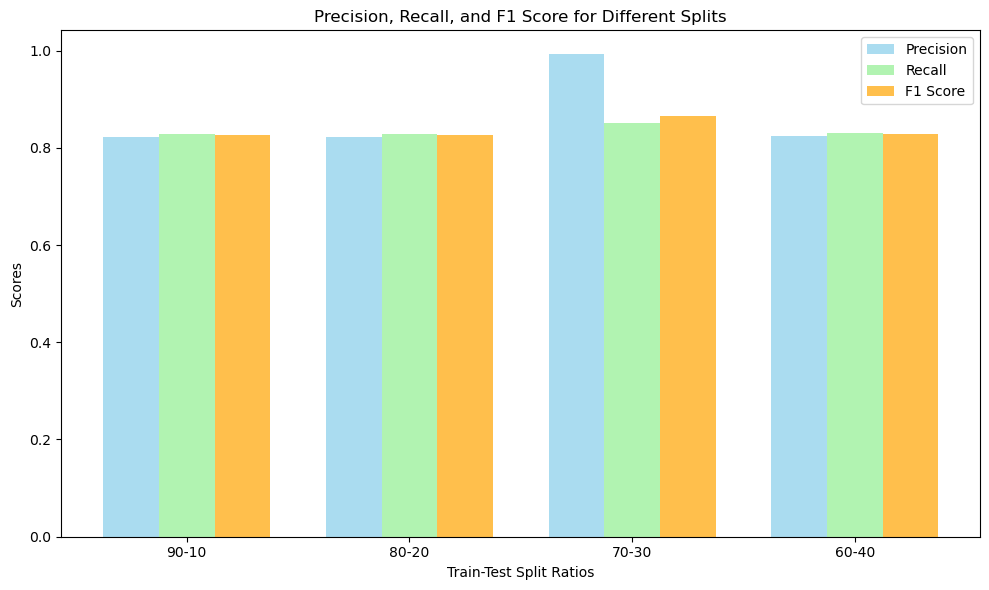

In [99]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Initialize lists to store metrics
precisions = []
recall_scores = []
f1_scores = []
ratios = ['90-10', '80-20', '70-30', '60-40']

datasets = []
for ratio in [0.9, 0.8, 0.7, 0.6]:  # Corresponds to 90-10, 80-20, etc.
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=1-ratio, random_state=42)
    datasets.append((X_train, X_test, y_train, y_test))

# Iterate through the split ratios
for ratio, (X_train, X_test, y_train, y_test) in zip(ratios, datasets):
    # Train the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Compute metrics
    precision = precision_score(y_test, y_pred, average='macro')  # Use 'binary' for binary classification
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    
    # Append metrics to respective lists
    precisions.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Plot precision, recall, and F1 score in one graph
x = np.arange(len(ratios))  # Locations for the bars
width = 0.25  # Width of the bars

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(x - width, precisions, width, label='Precision', color='skyblue', alpha=0.7)
plt.bar(x, recall_scores, width, label='Recall', color='lightgreen', alpha=0.7)
plt.bar(x + width, f1_scores, width, label='F1 Score', color='orange', alpha=0.7)

# Add labels and title
plt.xlabel('Train-Test Split Ratios')
plt.ylabel('Scores')
plt.title('Precision, Recall, and F1 Score for Different Splits')
plt.xticks(x, ratios)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()